# Simple Linear Regression - Lab

## Introduction

Regression analysis forms the basis of machine learning experiments. Understanding regression will help you to get the foundations of most machine learning algorithms. Ever wondered what's at the heart of an artificial neural network processing unstructured data like music and graphics? It can be linear regression!

## Objectives

You will be able to:

* Calculate the slope of a line using standard slope formula 
* Calculate the y-intercept using the slope value
* Draw a regression line based on calculated slope and intercept
* Predict the label of a previously unseen data element



## Let's get started

A first step towards understanding regression is getting a clear idea about "linear" regression and basic linear algebra. 

In the lesson, we showed the best-fit line's slope $\hat m$ can be calculated as:

$$\hat m = \rho \frac{S_Y}{S_X}$$

With $\rho$ being the correlation coefficient and  ${S_Y}$ and ${S_X}$ The standard deviation of $x$ and $y$ respectively. It can be shown that this is also equal to:

$$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$$

You'll use the latter formula in this lab. As in our previous lab, let's break down the formula into its parts. First, you'll import the required libraries and define some data points to work with. Next, you'll use some pre-created toy data in numpy arrays. Let's do this for you to give you a head start. 

In [1]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Initialize vectors X and Y with given values and create a scatter plot
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

## Create a scatter plot between X and Y and comment on the output

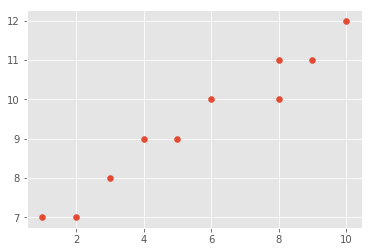

In [2]:
# Scatter plot
plt.scatter(X, Y)

In [4]:
# Your observations about relationship in X and Y 

# looks highly positively correlated, with slope of approximately 1/2

#

In a data analysis context, we can think of these points as two vectors:

* **vector X**: The independent variable or predictor
* **vector Y**: The dependent variable or target variable

## Write a function `calc_slope()`

Write a function `calc_slope()` that takes in x and y vectors and calculates the slope using the formula shown above. 

In [7]:
# Write the function to calculate slope as: 
# (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
def calc_slope(xs,ys):
    return (xs.mean() * ys.mean() - (xs*ys).mean()) / (xs.mean()**2 - (xs**2).mean())
    
    
calc_slope(X,Y)

# 0.5393518518518512

0.5393518518518512

Great, so we have our slope. Next we calculate the intercept. 

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat c = \overline y - \hat m \overline x $$


## Write a function best_fit()

Write a function `best_fit()` that takes in X and Y, calculates the slope and intercept using the formula. The function should return slope and intercept values. 

In [9]:
# use the slope function with intercept formula to return calculate slope and intercept from data points

def best_fit(xs,ys):
    m = calc_slope(xs, ys)
    c = ys.mean() - m * xs.mean()
    return m, c

# Uncomment below to test your function

m, c = best_fit(X,Y)
m, c

# (0.5393518518518512, 6.379629629629633)

(0.5393518518518512, 6.379629629629633)

We now have a working model with `m` and `c` as model parameters. We can create a line for the data points using the calculated slope and intercept:

* Recall that $y = mx + c$. We can now use slope and intercept values along with X data points (features) to calculate the Y data points (labels) of the regression line. 

## Write a function reg_line()

Write a function `reg_line()` that takes in slope, intercept and X vector and calculates the regression line using $y= mx + c$ for each point in X

In [26]:
def reg_line (m, c, xs):
    return (m * xs) + c
    


# Uncomment below
regression_line = reg_line(m,c,X)
regression_line

array([ 6.91898148,  7.45833333,  7.99768519,  8.53703704,  9.07638889,
        9.61574074, 10.69444444, 10.69444444, 11.2337963 , 11.77314815])

## Plot the (x,y) data points and draw the calculated regression line for visual inspection

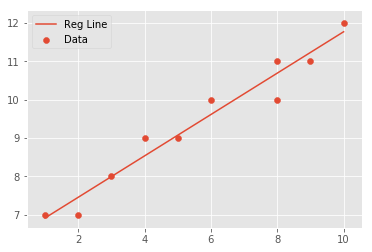

In [31]:
# Plot data and regression line
plt.plot(X, regression_line, label='Reg Line')
plt.scatter(X, Y, label='Data')
plt.legend();

So there we have it, our least squares regression line. This is the best fit line and does describe the data pretty well (still not perfect though). 

## Describe your Model Mathematically and in Words

In [9]:
# Your answer here
# This line minimalizes the sum of the square errors of residuals (actual values minus predicted)

# In words, a value of x=0 has a predicted y value of 6.379629629629633
# For each increase of 1 in the value of x, the value of y is predicted to rise by 0.5393518518518512



## Predicting label for new data

So, how might you go about actually making a prediction based on this model you just made?

Now that we have a working model with m and b as model parameters. We can fill in a value of x with these parameters to identify a corresponding value of $\hat y$ according to our model. Recall the formula:

$$\hat y = \hat mx + \hat c$$

Let's try to find a y prediction for a new value of $x = 7$ and unknown $y$, and plot the new prediction with existing data 

In [38]:
x_new = 7
y_predicted = m * x_new + c
y_predicted

#more interesting:
y_predicted = m * X + c
y_predicted
# 10.155092592592592

array([ 6.91898148,  7.45833333,  7.99768519,  8.53703704,  9.07638889,
        9.61574074, 10.69444444, 10.69444444, 11.2337963 , 11.77314815])

## Plot the prediction with actual data and regression line 

AttributeError: 'numpy.ndarray' object has no attribute 'append'

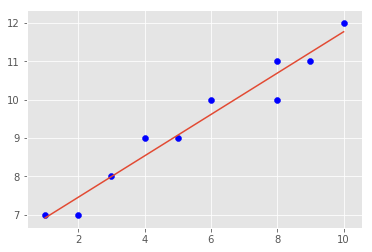

In [40]:
# Plot as above and show the predicted value

plt.plot(X, regression_line, label='Reg Line')
plt.scatter(X, Y, label='Data', color='blue')
plt.scatter(X, y_predicted.append(x_new*m+c), label='Predicted')
plt.legend();

You now know how to create your own models, which is great, but you still haven't answered one very important question: how accurate is our model? This will be discussed next.

## Summary

In this lesson, you learned how to draw a best fit line for given data labels and features, by first calculating the slope and intercept. The calculated regression line was then used to predict the label ($\hat y$-value) of a previously unseen feature ($x$-value). The lesson uses a simple set of data points for demonstration.